# Lending Club Case Study

The Case Study Analysis is divided into following parts:- <br>
    1) Data Understanding <br>
    2) Data Cleaning and Manipulation <br>
    3) Data Analysis <br>
    4) Presentation and Recommendations <br>

##  Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset=pd.read_csv("Loan.csv",sep=",",low_memory=False)
#Understanding the basic details of Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [2]:
#Number of rows and columns in the Dataset
Dataset.shape

(39717, 111)

In [3]:
#Understanding the rows and column
Dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Understanding the Columns
Dataset.columns
#Making First row as header
#Dataset.columns=Dataset.iloc[0]
Dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Loan Status is considered as target variable. Loan status will be analysed across the independent varuables.

## Data Cleaning

In [5]:
#Checking the Missing Values
Dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#Calculating the missing value interms of %
round((Dataset.isnull().sum()/len(Dataset.index)*100),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
#Grouping the columns that contain missing values more than 90%
Missingcol=Dataset.columns[round((Dataset.isnull().sum()/len(Dataset.index)*100),2)>90]
#Removing the columns containing missing values
Dataset_1=Dataset.drop(Missingcol,axis=1)
#Checking the modified dataset
Dataset_1.shape

(39717, 55)

In [8]:
#Calculating the missing value interms of %
round((Dataset_1.isnull().sum()/len(Dataset_1.index)*100),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
#Checking if the column desc and mths_since_last_delinq is revelant?
Dataset_1.loc[:,['desc','mths_since_last_delinq']].head()


,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [10]:
#Removing the desc and mths_since_last_delinq
Dataset_2=Dataset_1.drop(['desc','mths_since_last_delinq'],axis=1)
#Removing M=First two Columns as it is irrevelant for analysis
Dataset_3=Dataset_2.drop(['id','member_id'],axis=1)
Dataset_3.shape

(39717, 51)

In [11]:
#Summarising the missing values row wise
Dataset_3.isnull().sum(axis=1)
len(Dataset_3[Dataset_3.isnull().sum(axis=1)>5].index)
Dataset_3.isnull().sum(axis=0)

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [12]:
Dataset_3.info()
## Checking the Datatypes of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [13]:
#Converting Loan amount Column into Float
Dataset_3['int_rate']=Dataset_3['int_rate'].str.rstrip('%').astype('float',copy=True, errors='raise')
Dataset_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  float64
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [14]:
#Conerting datatype of term from object to int
Dataset_3['term']=Dataset_3['term'].str.rstrip(' months').astype('int',copy=True, errors='raise')
Dataset_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  int32  
 4   int_rate                    39717 non-null  float64
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [15]:
#Converting issue_d from object to date 

Dataset_3['issue_d']=pd.to_datetime(Dataset_3['issue_d'],errors='coerce')
Dataset_3.info()
Dataset_3['issue_d']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   39717 non-null  int64         
 1   funded_amnt                 39717 non-null  int64         
 2   funded_amnt_inv             39717 non-null  float64       
 3   term                        39717 non-null  int32         
 4   int_rate                    39717 non-null  float64       
 5   installment                 39717 non-null  float64       
 6   grade                       39717 non-null  object        
 7   sub_grade                   39717 non-null  object        
 8   emp_title                   37258 non-null  object        
 9   emp_length                  38642 non-null  object        
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

## Data Analysis


After Cleaning the data we need to understand the columns that are required for our Data Analysis.
We can remove the columns that are not required or which are not useful for our Data Analysis.
The main objective of Data Analysis is to analyse whether a person will repay the loan or not at the time of Loan application.
The column "pymt_plan" is not going to have any impact on the loan status which can be removed.
Similarly the column "url" is not going to have any impact on the loan status which can be removed.
The Columns:-  "delinq_2yrs", "earliest_cr_line","inq_last_6mths","open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc",
 "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "application_type

In [16]:
#Making the subset of columns that are not required for analysis
Not_required=  ["url","title",
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type","pymnt_plan","collections_12_mths_ex_med","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","policy_code"]
Not_required

['url',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'pymnt_plan',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'policy_code']

In [17]:
#Removing the columns that are not required for data analysis
Dataset_4=Dataset_3.drop(Not_required, axis=1)
Dataset_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int32         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_title             37258 non-null  object        
 9   emp_length            38642 non-null  object        
 10  home_ownership        39717 non-null  object        
 11  annual_inc            39717 non-null  float64       
 12  verification_status   39717 non-null  object        
 13  issue_d         

In [18]:
#The Target column for Data Analysis is Loan_Status
Dataset_4['loan_status']=Dataset_4['loan_status'].astype('category')
Dataset_4['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
#Current loan status is not required for analysis
#Filtering only Fully Paid and Charged Offs
Dataset_4=Dataset_4[Dataset_4['loan_status']!='Current']
#Converting the loan_status into Numeric Datatype
Dataset_4['loan_status'] = Dataset_4['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
Dataset_4['loan_status'] = Dataset_4['loan_status'].astype(int)
Dataset_4['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [20]:
Dataset_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int32         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             36191 non-null  object        
 9   emp_length            37544 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

In [21]:
Dataet_4 = Dataset_4[~Dataset_4['emp_length'].isnull()]
Dataset_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int32         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             36191 non-null  object        
 9   emp_length            37544 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

In [22]:
import re
Dataset_4['emp_length'] = Dataset_4['emp_length'].apply(lambda x: re.findall('\d+', str(x))[:])
Dataset_4['emp_length'] = Dataset_4['emp_length'].apply(lambda x: pd.to_numeric(x))
print(Dataset_4['emp_length'])

0        [10]
1         [1]
2        [10]
3        [10]
5         [3]
         ... 
39712     [4]
39713     [3]
39714     [1]
39715     [1]
39716     [1]
Name: emp_length, Length: 38577, dtype: object



## Univariate Anaylsis

Datas are of two types 0
1) Numerica Data : The datas that are quantitative are classified as Numeric data
2) Categorical Data : The daras that are qualitative are classified as Categorical data

Categorical Data is in turn classified into Ordered and Unordered.
The datas that can be ranked are ordered and which cannot be ranked are unordered

In [23]:
#Differentiating between categorical and Numeric data in dataset

Numeric=['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','emp_length','installment','annual_inc','dti','pub_rec_bankruptcies']
print(Numeric, "are numeric.\n") 
Categorical=['grade','sub_grade','emp_title','home_ownership','verification_status','loan_status','purpose','zip_code','addr_state']
print(Categorical, "are categorical\n")


#Differentiating between Ordered and Unordered Variables

Ordered=['grade','sub_grade','loan_status']
print(Ordered, "are ordered categorical variables\n")
Unordered=['emp_title','home_ownership','verification_status','purpose','zip_code','addr_state']
print(Unordered, "are unordered categorical variables")


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'emp_length', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies'] are numeric.

['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'zip_code', 'addr_state'] are categorical

['grade', 'sub_grade', 'loan_status'] are ordered categorical variables

['emp_title', 'home_ownership', 'verification_status', 'purpose', 'zip_code', 'addr_state'] are unordered categorical variables


### Univariate Analysis of Ordered Categorical Variables

0    32950
1     5627
Name: loan_status, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

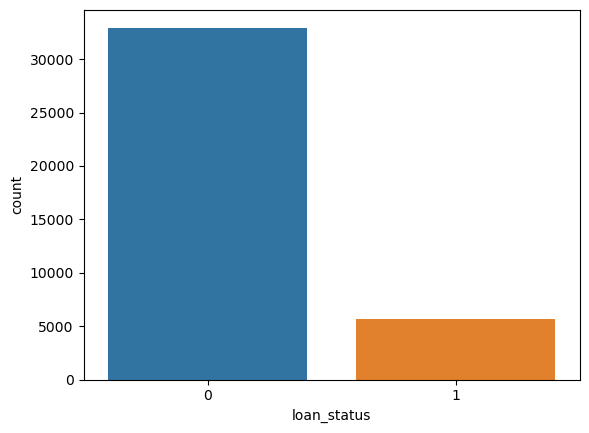

In [24]:
# Analysis using Bar Graph
print(Dataset_4['loan_status'].value_counts())
sns.countplot(x=Dataset_4['loan_status'])

#### Conclusion No.1<br>Most of the customers that are applying for loan tend get default<br>Default rate is higher on the total loan applications



<Axes: xlabel='grade', ylabel='count'>

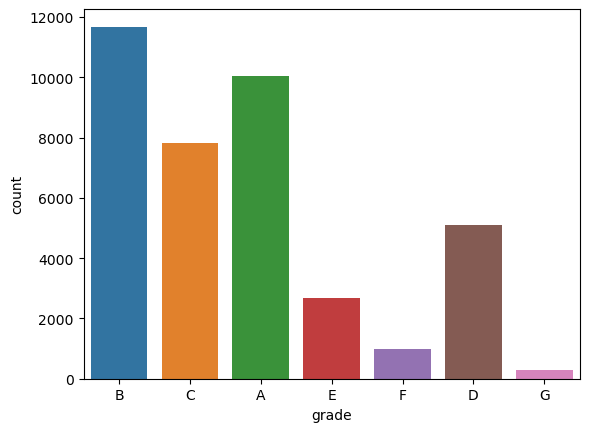

In [25]:
sns.countplot(x=Dataset_4['grade'])

#### Conclusion No.2<br>1) Customers get loan maximum with grade B,C,A and D than E,F and G<br>2) Customers with grade B is maximum and with grade G the minimum



In [26]:
#Analysis using describe(); Statistical Analysis

Dataset_4['loan_status'].describe()


count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [27]:
Dataset_4['grade'].describe()
Dataset_5=Dataset_4

### Univariate Analysis of Un-ordered Categorical Variables


<Axes: xlabel='emp_title'>

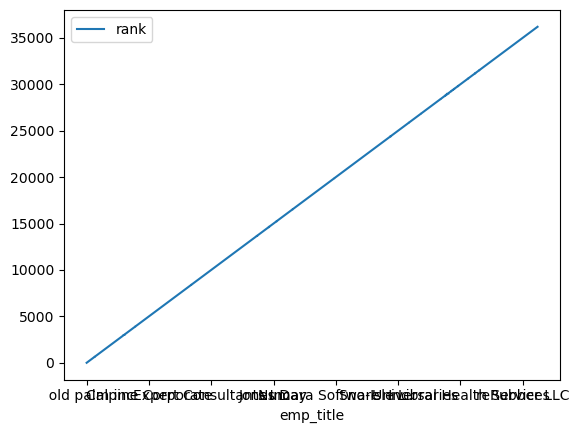

In [28]:
#Using Rank Vs Frequency plot

Dataset_4["rank"]=Dataset_4["emp_title"].rank()
Dataset_4.sort_values("rank", inplace = True)
Dataset_4.plot(x='emp_title', y='rank')


<Axes: xlabel='home_ownership'>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

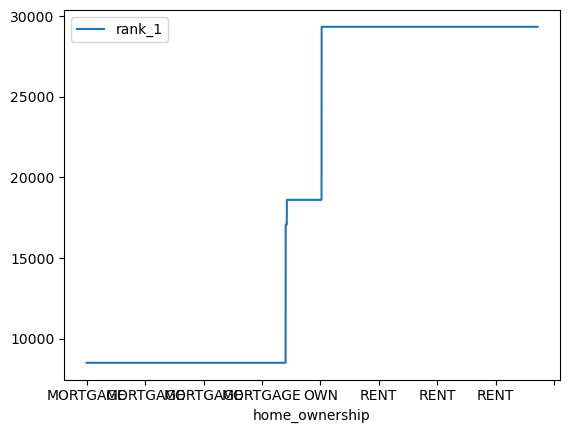

In [29]:
plt.figure(figsize=(16, 6))
Dataset_4["rank_1"]=Dataset_4["home_ownership"].rank()
Dataset_4.sort_values("home_ownership", inplace = True)
plt.figure(figsize=(16, 6))
Dataset_4.plot(x='home_ownership', y='rank_1')

<Axes: xlabel='verification_status'>

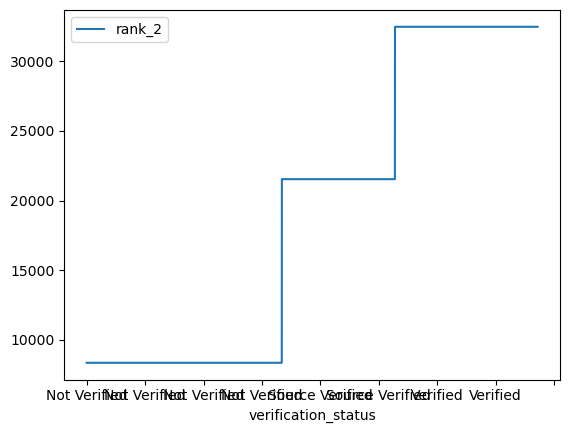

In [30]:
Dataset_4["rank_2"]=Dataset_4["verification_status"].rank()
Dataset_4.sort_values("verification_status", inplace = True)
Dataset_4.plot(x='verification_status', y='rank_2')

<Axes: xlabel='purpose'>

<Figure size 1600x600 with 0 Axes>

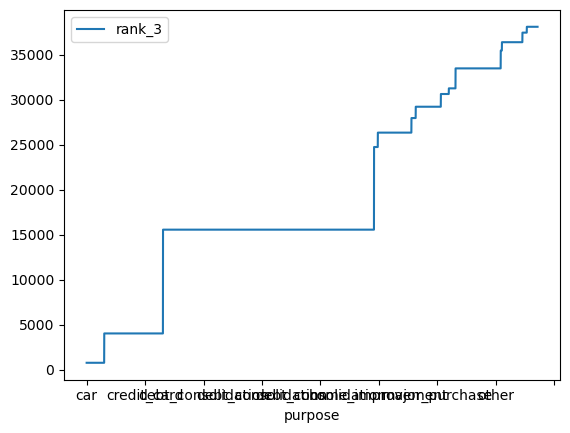

In [67]:
Dataset_4["rank_3"]=Dataset_4["purpose"].rank()
Dataset_4.sort_values("purpose", inplace = True)
plt.figure(figsize=(16, 6))
Dataset_4.plot(x='purpose', y='rank_3')

<Axes: xlabel='addr_state'>

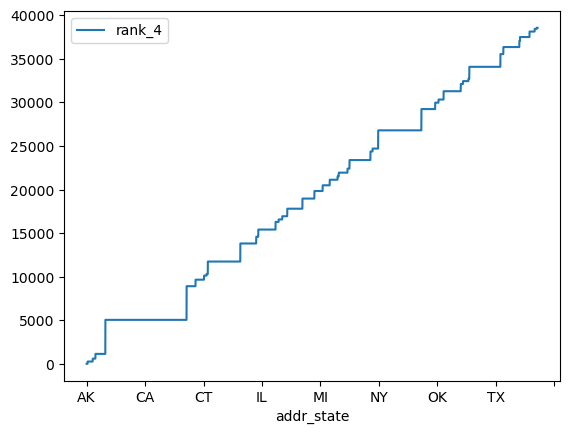

In [32]:
Dataset_4["rank_4"]=Dataset_4["addr_state"].rank()
Dataset_4.sort_values("addr_state", inplace = True)
Dataset_4.plot(x='addr_state', y='rank_4')

### Univariate Analysis of Numeric Variables

<Axes: >

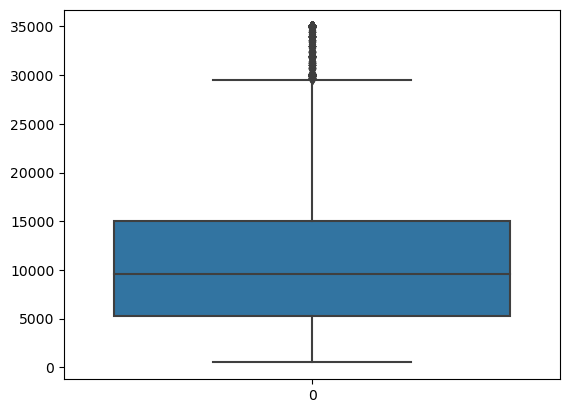

In [33]:
#Analsysing using box plotOn 
sns.boxplot(Dataset_4['loan_amnt']) 


Conclusion:-<br>
    1) Average loan amount is around 8000<br>
    2) The loan amount contains outliers as there are many data point which are more than 0.75 Percentile

<Axes: >

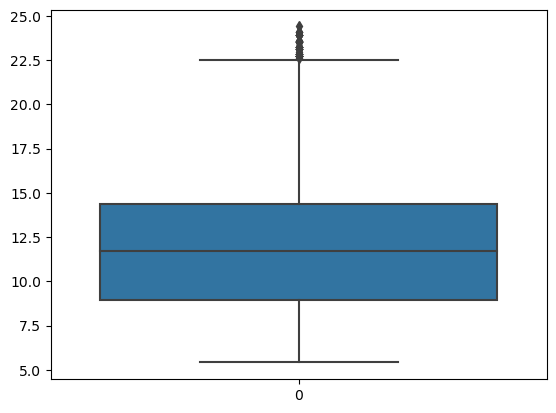

In [34]:

sns.boxplot(Dataset_4['int_rate']) 


Conclusion:-<br>
    1) Average interest rate  is around 12% <br>
    2) The loan amount contains outliers as there are many data point which are more than the 0.75 Percentile

<Axes: >

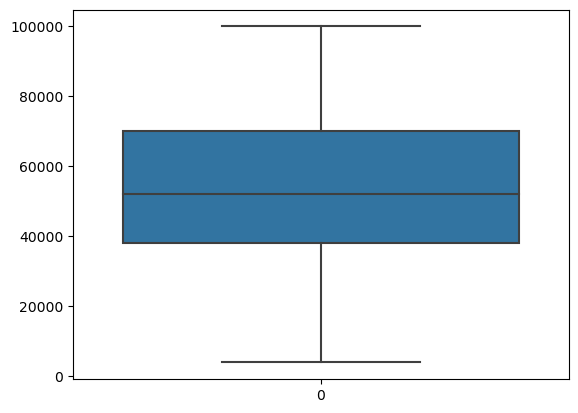

In [35]:
#Removing the outliers
sns.boxplot(Dataset_4[Dataset_4['annual_inc']<100000]['annual_inc'])


Conclusion:-<br>
    1) Outliers are more in the annual income column removing the same would improve the data analysis<br>
    2) After removing the average income is coming to be 50000

In [36]:
Dataset_4.info()
#sns.boxplot(Dataset_4['emp_length'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 5065 to 32406
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int32         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             36191 non-null  object        
 9   emp_length            38577 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d      


### Bivariate Analysis (Numeric to Numeric)


In [37]:
# Use of correlation
Dataset_5.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,pub_rec_bankruptcies,rank,rank_1,rank_2,rank_3,rank_4
loan_amnt,1.000000,0.981790,0.937922,0.346650,0.301265,0.932260,0.268999,0.059463,0.062436,-0.035981,-0.027018,-0.167622,0.402224,-0.100186,-0.002339
funded_amnt,0.981790,1.000000,0.956172,0.324893,0.304930,0.958035,0.264798,0.056497,0.062194,-0.036995,-0.025605,-0.162252,0.395839,-0.103710,-0.000937
funded_amnt_inv,0.937922,0.956172,1.000000,0.343922,0.297473,0.905464,0.251981,0.037781,0.070663,-0.041193,-0.022942,-0.159472,0.410493,-0.109877,-0.001873
term,0.346650,0.324893,0.343922,1.000000,0.440206,0.090456,0.043866,0.173487,0.076182,0.014529,0.006720,-0.099387,0.247776,-0.024042,0.007534
int_rate,0.301265,0.304930,0.297473,0.440206,1.000000,0.277203,0.048899,0.211390,0.110913,0.083027,0.012758,0.072238,0.201384,-0.002874,-0.004959
installment,0.932260,0.958035,0.905464,0.090456,0.277203,1.000000,0.267842,0.027153,0.052038,-0.033361,-0.027668,-0.131660,0.349352,-0.108119,-0.004737
annual_inc,0.268999,0.264798,0.251981,0.043866,0.048899,0.267842,1.000000,-0.040867,-0.121530,-0.016224,-0.031344,-0.191522,0.122185,0.011775,-0.010059
loan_status,0.059463,0.056497,0.037781,0.173487,0.211390,0.027153,-0.040867,1.000000,0.045078,0.047757,0.024713,0.022852,0.048211,0.044573,-0.024117
dti,0.062436,0.062194,0.070663,0.076182,0.110913,0.052038,-0.121530,0.045078,1.000000,0.005966,0.001296,0.024499,0.068330,-0.144829,0.020632
pub_rec_bankruptcies,-0.035981,-0.036995,-0.041193,0.014529,0.083027,-0.033361,-0.016224,0.047757,0.005966,1.000000,0.012847,-0.031544,-0.009868,-0.018060,-0.006676


<function matplotlib.pyplot.show(close=None, block=None)>

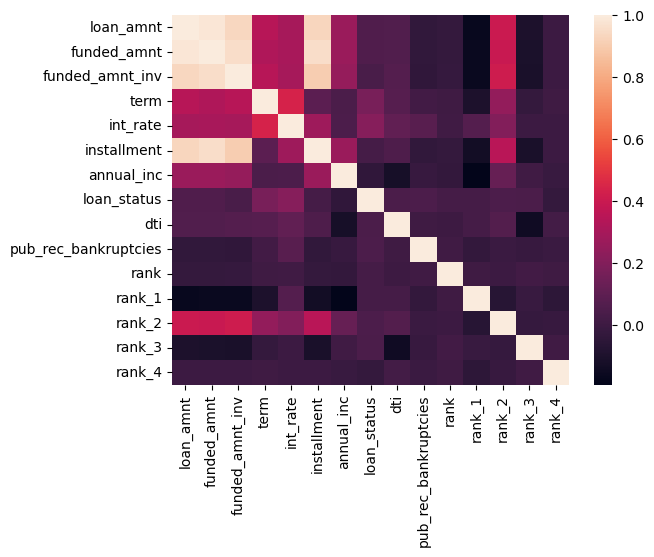

In [38]:

sns.heatmap(Dataset_5.corr())
plt.show

Conclusion:-<br>
    1) The annual income is highly correlated with the loan_status and the least correlation with interest rate


### Bivariate Analysis (Numeric to Category)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

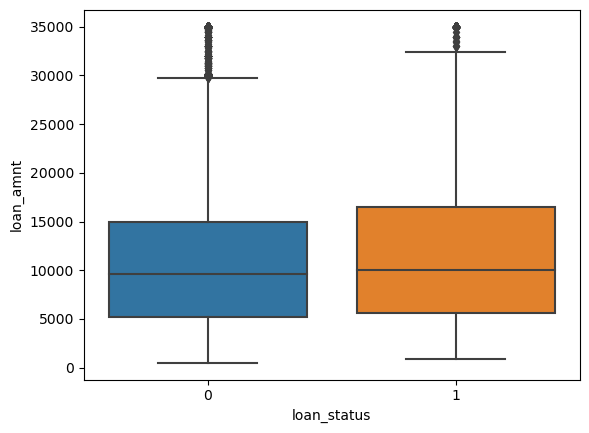

In [39]:
# Impact of loan amount on Loan Status
sns.boxplot(x=Dataset_5['loan_status'],y=Dataset_5['loan_amnt'])

Conclusion:- The customers with lesser loan amount tend to default more

<Axes: xlabel='loan_status', ylabel='annual_inc'>

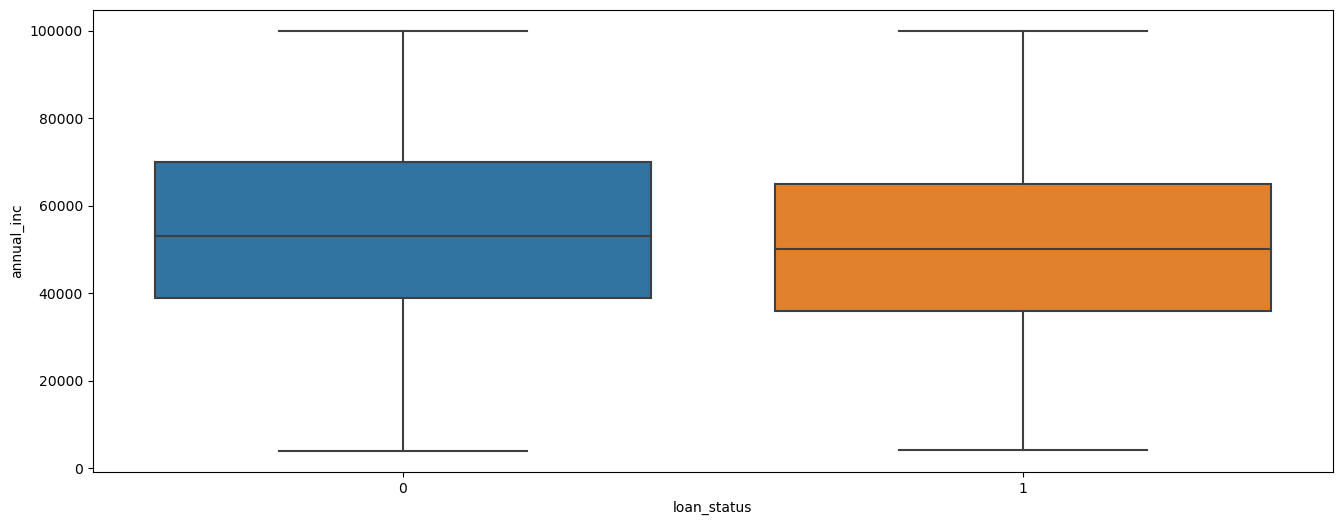

In [40]:
# Impact of Salary on Loan Status
plt.figure(figsize=(16, 6))
sns.boxplot(x=Dataset_5['loan_status'],y=Dataset_5[Dataset_5['annual_inc']<100000]['annual_inc'])

Conclusion:- The customers with more annual income tend to default more

<Axes: xlabel='loan_status', ylabel='int_rate'>

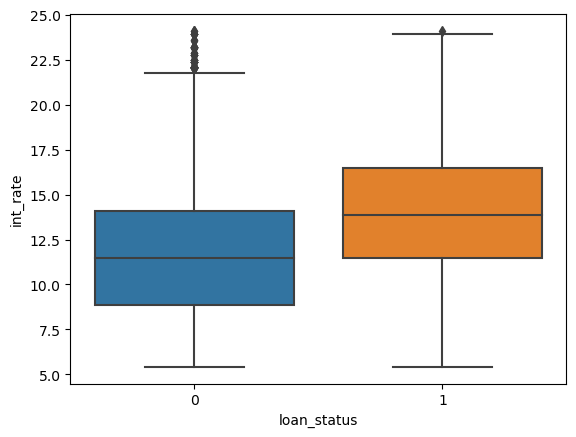

In [68]:
# Impact of interest rate on Loan Status

sns.boxplot(x=Dataset_5['loan_status'],y=Dataset_5['int_rate'])

Conclusion:- The customers with less interest rate tend to default more

<Axes: xlabel='loan_status', ylabel='installment'>

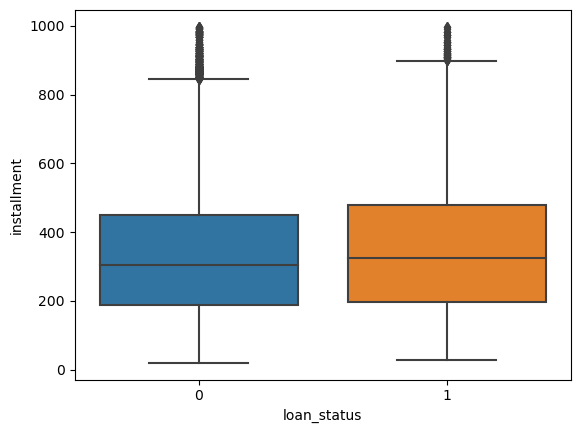

In [69]:
# Impact of installment on Loan Status

sns.boxplot(x=Dataset_5['loan_status'],y=Dataset_5[Dataset_5['installment']<1000]['installment'])

Conclusion:- The customers with less installments tend to default more

### Bivariate Analysis Category to Category

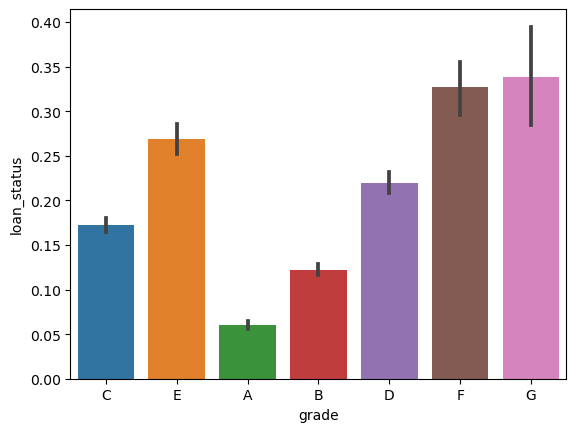

In [43]:
# Understanding Default rates across Grades
sns.barplot(x='grade', y='loan_status', data=Dataset_5)
plt.show()

The customers with grade 'G' tend to default more. <br>
The order are as below <br>
Default Rate = G>F>E>D>C>B>A

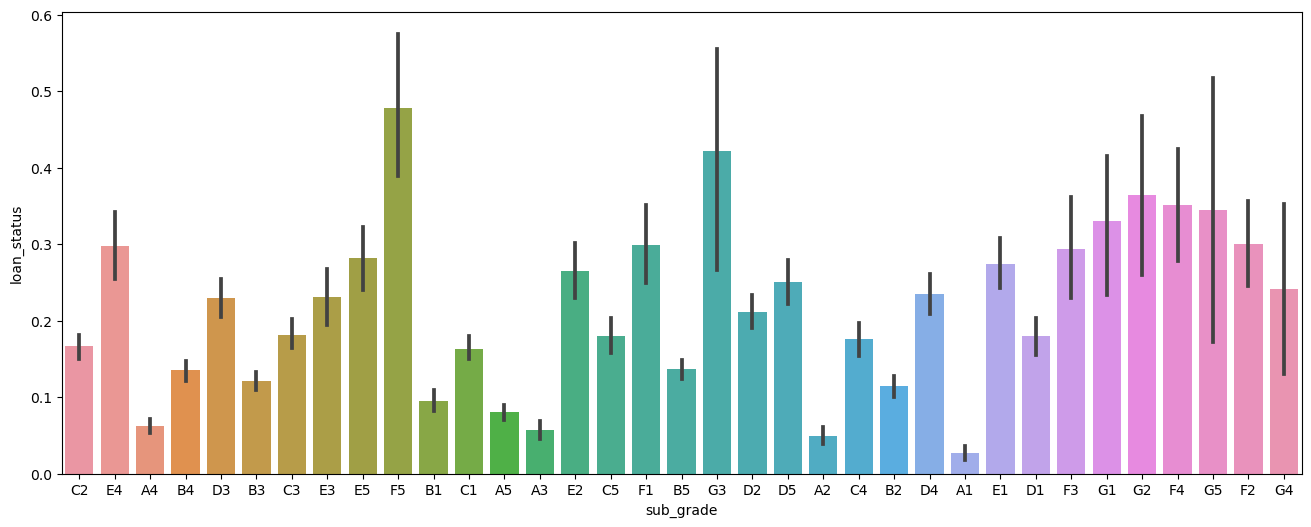

In [44]:
# Understanding Default rates across Subgrade
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=Dataset_5)

plt.show()

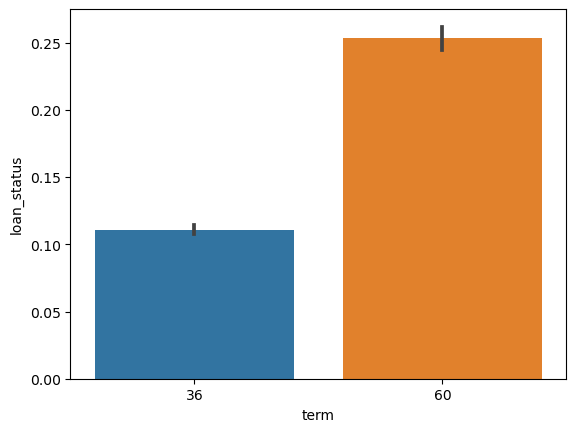

<Figure size 5000x2600 with 0 Axes>

In [45]:
# Understanding Default rates across Term
sns.barplot(x='term', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The custormer with 60 months term period tend to default more than 36 months term period

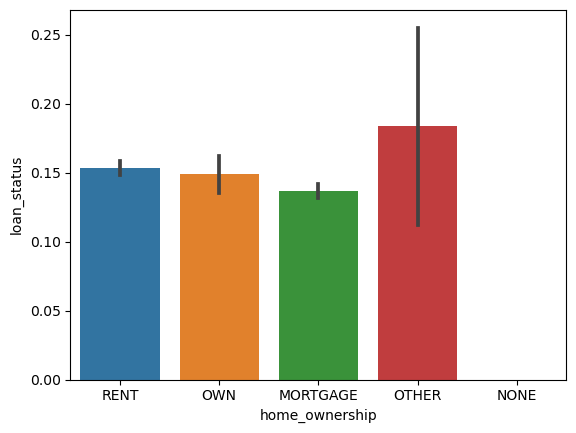

<Figure size 5000x2600 with 0 Axes>

In [46]:
# Understanding Default rates across Term
sns.barplot(x='home_ownership', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The custormer with home ownership classified as other tend to default more.<br>
    The order is as follow:-
        Other>Rent>Own>Mortgage

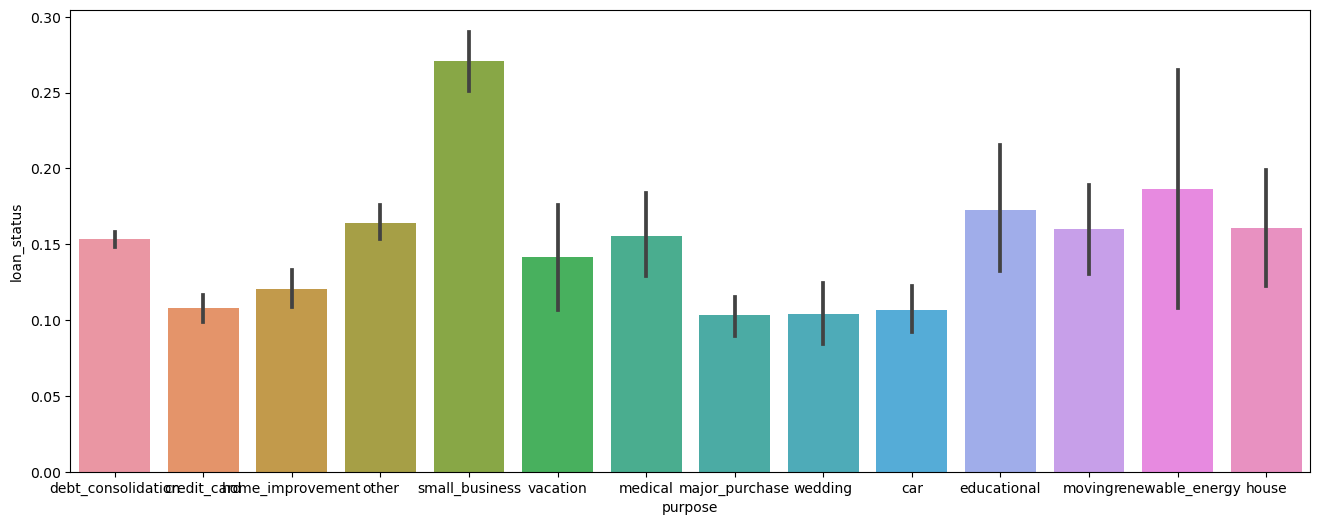

In [47]:
# Understanding Default rates verification status
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=Dataset_5)

plt.show()

Conclusion:-The loan got for the purpose of small business has the maximum chances for getting default and the least is major purchase

### Segmented Univariate Analysis

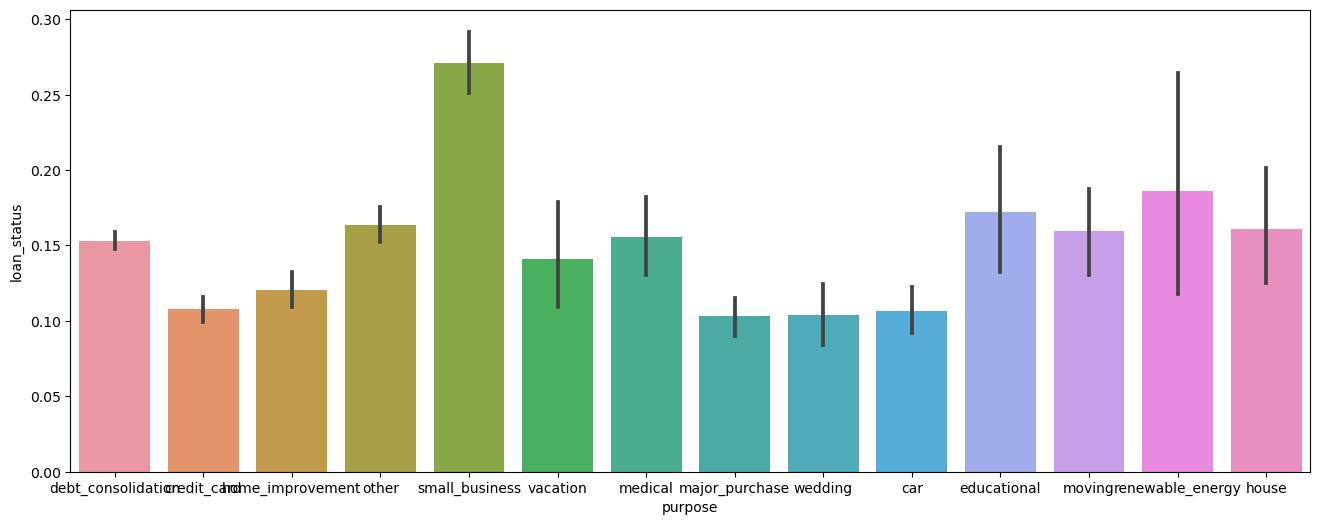

In [48]:
# Understading default rates across purpose
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=Dataset_5)

plt.show()

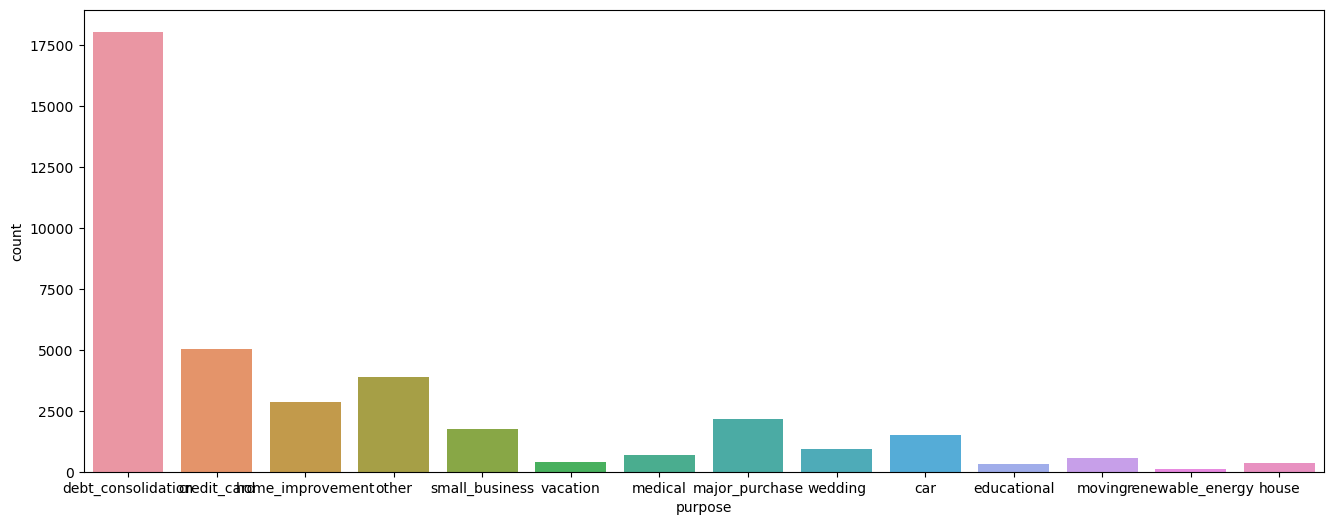

In [49]:
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=Dataset_5)
plt.show()

The Top 5 loan types are Consolidation,Credit Card, home improvement and Major purchase

In [50]:
#Filtering the top 5 loan types from dataset
Filter =["credit_card","debt_consolidation","home_improvement","major_purchase"]
Dataset_5=Dataset_5[Dataset_5['purpose'].isin(Filter)]
Dataset_5['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

<Axes: xlabel='purpose', ylabel='count'>

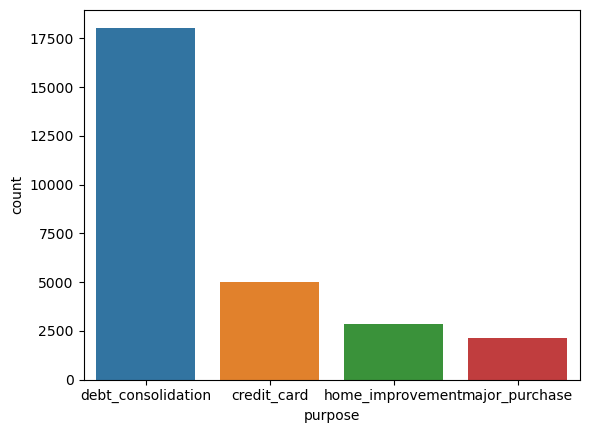

In [51]:
sns.countplot(x=Dataset_5['purpose'])

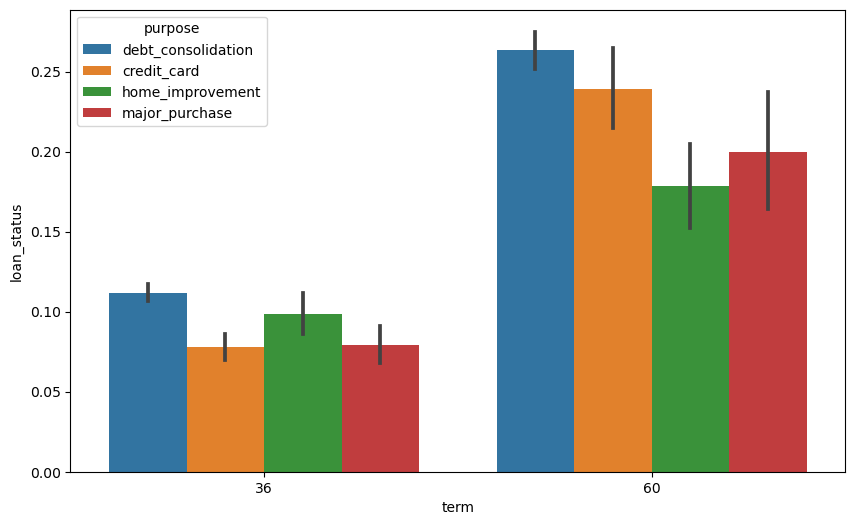

In [52]:
#Analysing the top five purposes for laon across term
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=Dataset_5)
plt.show()

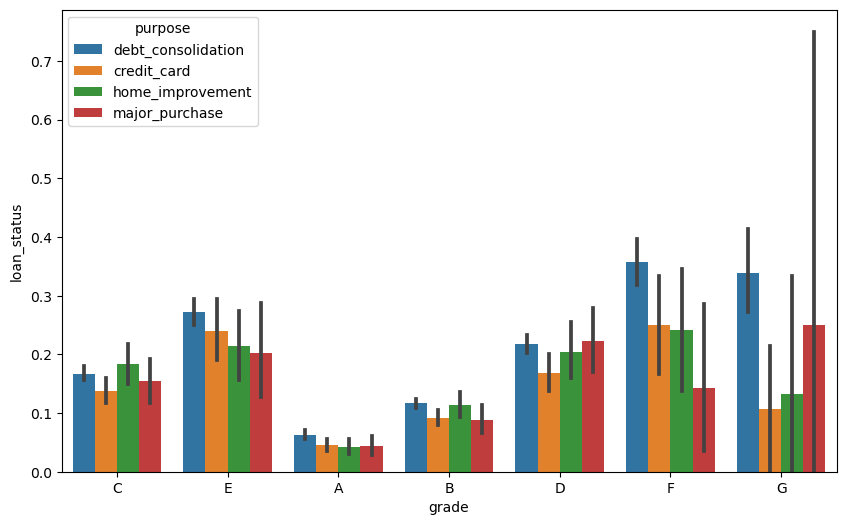

In [53]:
plt.figure(figsize=[10, 6])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=Dataset_5)
plt.show()

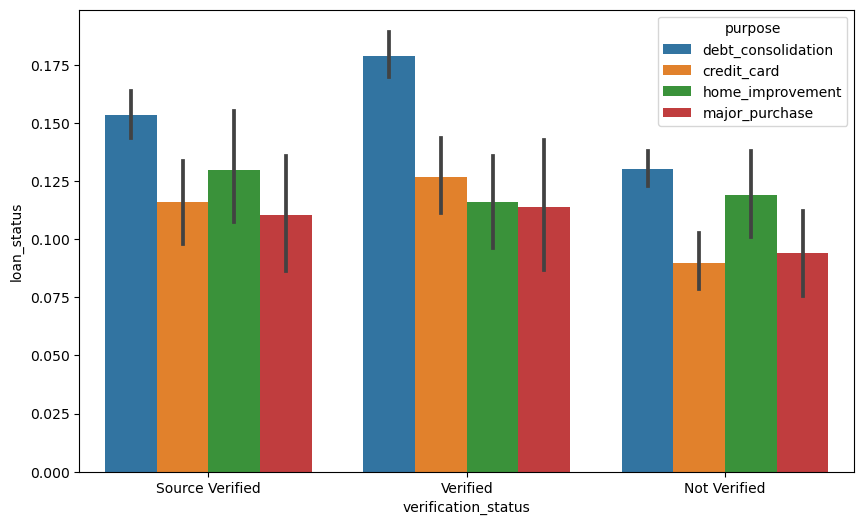

In [54]:
plt.figure(figsize=[10, 6])
sns.barplot(x='verification_status', y="loan_status", hue='purpose', data=Dataset_5)
plt.show()

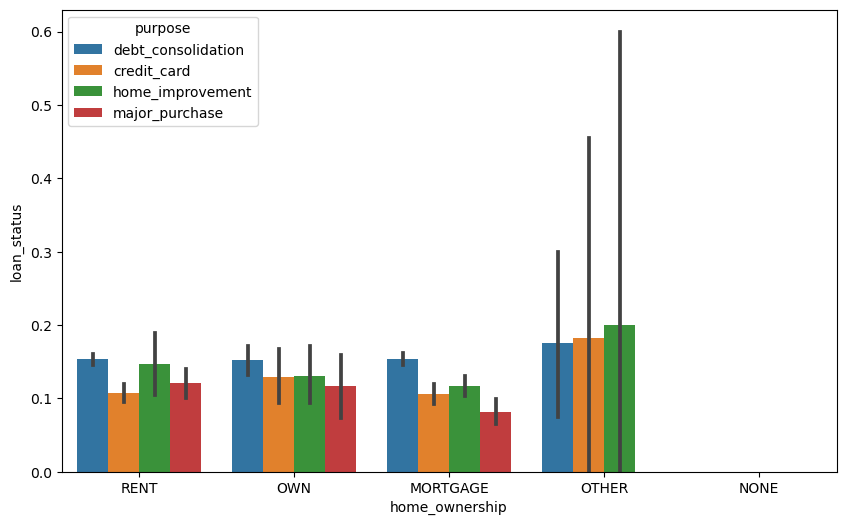

In [55]:
plt.figure(figsize=[10, 6])
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=Dataset_5)
plt.show()

## Derived Metrics

### Type Driven

In [56]:
# Lets convert interest rate to categorical variable low, medium and high
def int_rate(n):
    if n < 10:
        return 'Low'
    elif n > 10 and n < 15:
        return 'Medium'
    else:
        return 'High'
Dataset_5['int_rate_cat'] = Dataset_5['int_rate'].apply(lambda x: int_rate(x))

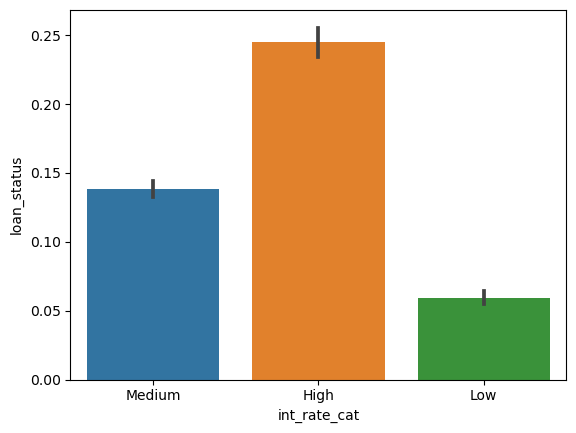

<Figure size 5000x2600 with 0 Axes>

In [57]:
# Understanding Default rates across Interest Rate
sns.barplot(x='int_rate_cat', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The loan with higher interest rate tend to default more

In [58]:
# Lets convert Annual income to categorical variable low, medium and high
def annual_inc(n):
    if n < 200000:
        return 'Low'
    elif n > 200000 and n < 400000:
        return 'Medium'
    else:
        return 'High'
Dataset_5['annual_inc_cat'] = Dataset_5['annual_inc'].apply(lambda x: annual_inc(x))

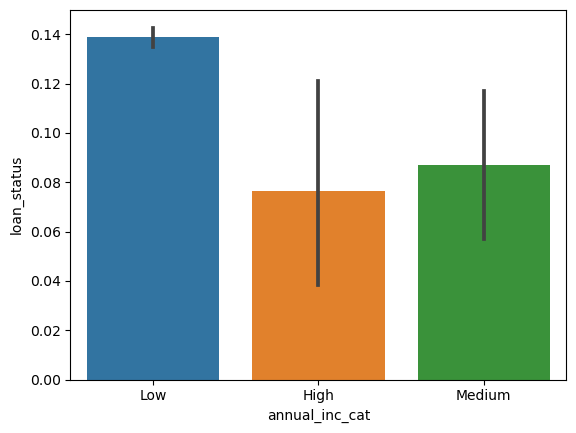

<Figure size 5000x2600 with 0 Axes>

In [59]:
# Understanding Default rates across Annual Income
sns.barplot(x='annual_inc_cat', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The loan with lower income of customers tend to default more

In [60]:
# Lets convert Loan amount to categorical variable low, medium and high
def loan_amnt(n):
    if n < 5000:
        return 'Low'
    elif n > 5000 and n < 20000:
        return 'Medium'
    else:
        return 'High'
Dataset_5['loan_amnt_cat'] = Dataset_5['loan_amnt'].apply(lambda x: loan_amnt(x))

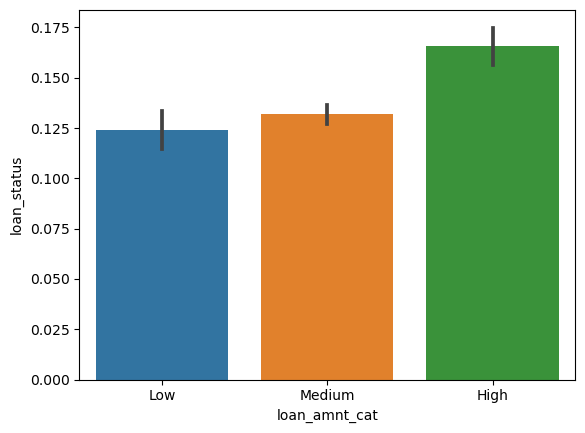

<Figure size 5000x2600 with 0 Axes>

In [61]:
# Understanding Default rates across Loan Amount
sns.barplot(x='loan_amnt_cat', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The loan with higher loan amount tend to default more

In [62]:
# Lets convert Loan amount to categorical variable low, medium and high
def dti(n):
    if n < 10:
        return 'Low'
    elif n > 10 and n < 20:
        return 'Medium'
    else:
        return 'High'
Dataset_5['dti_cat'] = Dataset_5['dti'].apply(lambda x: dti(x))

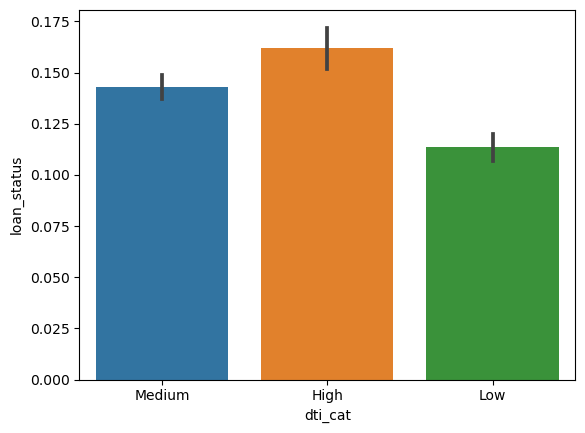

<Figure size 5000x2600 with 0 Axes>

In [63]:
# Understanding Default rates across Loan Amount
sns.barplot(x='dti_cat', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The loan with high dti tend to default more 

In [64]:
# extracting month and year from issue_date
Dataset_5['month'] =Dataset_5['issue_d'].apply(lambda x: x.month)
Dataset_5['year'] = Dataset_5['issue_d'].apply(lambda x: x.year)

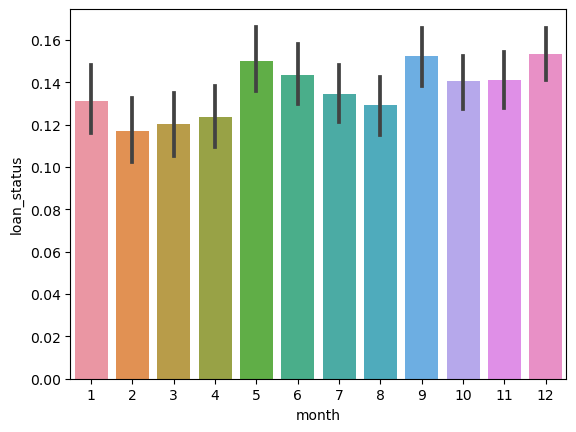

<Figure size 5000x2600 with 0 Axes>

In [65]:
sns.barplot(x='month', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The Loans taken in the month of December tend to default more

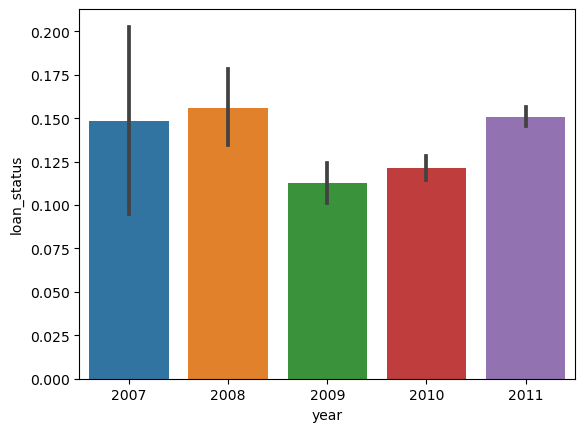

<Figure size 5000x2600 with 0 Axes>

In [66]:
sns.barplot(x='year', y='loan_status', data=Dataset_5)
plt.figure(figsize=(50, 26))
plt.show()

Conclusion:- The year 2008 has maximum default rates and the year 2009 has the least default rate